
<img src=https://www.usergioarboleda.edu.co/sergiointeractivo/wp-content/uploads/2020/03/kisspng-sergio-arboleda-university-logo-business-school-encuentro-colombiano-de-combinatoria-ecco-2-18-5b778e55a3c529.9334156515345618776708-300x271.png>

Universidad Sergio Arboleda
Escuela de Ingeniería - Programa Ingeniería de sistemas y Telecomunicaciones
Autor: Ing. Jonattan Infante Vargas - jonattan.infante01@correo.usa.edu.co

# **Rendimiento Cython - Python** Examen Final Computación Paralela y Distribuida

## Contexto

Actualmente el rendimiento es una característica muy importante en las aplicaciones. Sin embargo, lenguajes como Python nos permite crear aplicaciones rápidamente gracias a su amplio número de librerías como **Numpy** que ha sido construido desde Cython para garantizar un mejor rendimiento al procesar grandes volumenes de datos.


### Algoritmo de Regresión Logística

La regresión logística es una técnica de análisis que utiliza las matemáticas para encontrar las relaciones entre N variables con el proposito de predecir el valor de uno de esos factores basándose en el otro[1]. La implementación del algoritmo puede ser consultado en la sección de `src/algorithms_pyhon/LogisticRegression.py` y su metodo principal es `training_model` donde se ha configurado un set de datos aleatorio, valores iniciales para los pesos y un punto de corte. El algoritmo usa por defecto 1000 iteraciones para ir ajustando los pesos y el punto de corte para ir mejorando las valores de las predicciones.

### Algoritmo Genético

La implementación del algoritmo genético usada en esta prueba hace evolucionar una población inicial de genes que en principio son combinaciones aleatorias de números binarios que representa la selección de un elemento de acuerdo al problema de la mochila[2]. La población de genes es sometiendo a una evaluación que calcula que tan idóneo es el gen y por tanto las probabilidades que tiene de ser seleccionado como padre de la siguiente generación agregando una mutación. El algoritmo puede ser consultado en el repositorio en `src/algorithms_pyhon/BackpackGenetics.py` y su método principal es `algorithm_genetic` que recibe el número de población inicial y la cantidad de generaciones.

## Metodología

Con la finalidad de comprender la eficiencia de Python con respecto a Cython, se han usado el algoritmo para el entrenar un modelo de machine learning por medio de la técnica de regresión logística, un segundo algoritmo enfocado en la resolución del problema de la mochila[3] usando la técnica de algoritmos genéticos para encontrar el mejor gen que resuelve el problema.

Las pruebas de rendimiento contemplan el error asociado  a cada iteración por tal motivo se realizan un conjunto de 30 pruebas donde en el primer algoritmo se establece un conjunto de 1000 datos con 3 variables aleatorias y en el segundo se configuró una población inicial de 100 con 1000 iteraciones.

### Recomendación

Al ejecutar el conjunto de pruebas es recomendable no estar realizando otros procesos diferentes a los que por defecto el sistema operativo realiza porque pueden afectar los resultados.

### Equipo de prueba

|  Elemento  |        Valor       |
|:----------:|:------------------:|
| Procesador | AMD® Ryzen 5 3500u |
| Nucleos    | 8                  |
| Hilos      | 2 por nucléo       |
| Memoria    | 8 GiB              |
| OS         | Ubuntu 22.04.1 LTS |




## Analisis

In [57]:
import pandas as pd
# Se cargan los datos extraidos con las pruebas hechas.
algorithm_genetic_basic = pd.read_csv('./results/BackPackGeneticsBasic.csv', names=["Python", "Cython"]).iloc[:, 0:3]
algorithm_genetic_optimization = pd.read_csv('./results/BackPackGeneticsOptimization.csv',names=["Python", "Cython"]).iloc[:, 0:3]

algorithm_regression_basic = pd.read_csv('./results/LogisticRegressionBasic.csv', names=["Python", "Cython"]).iloc[:, 0:3]
algorithm_regression_optimization = pd.read_csv('./results/LogisticRegressionOptimization.csv', names=["Python", "Cython"]).iloc[:, 0:3]

# Algoritmo Genético
### Prueba Básica
En una primera instancia se ha verificado las anotaciones generadas por Cython para la implementación del algoritmo genético y puede ser visualizadas a continuación donde la información entregada por las anotaciones nos revela que al momento de pasarlo por cython sin ningún cambio notamos que cython debe generar un extenso código de cython para replicar el funcionamiento en python, lo cual afecta los tiempos de ejecución.

Es importante resaltar que la implantación original usa en su mayor parte la librería de Numpy, la cual se encuentra muy optimizada explicando por qué los tiempos en las pruebas básicas sean muy similares ***(Ver grafica 1)*** en Python y Cython.

### Prueba Optimizada

En las anotaciones (HTML) generadas después de realizar una optimización de tipos de datos vemos que el código de cython para las funciones principales es menor al visualizar menos regiones en color amarillo. Al ver los tiempos en cada prueba ***(Ver Grafica 2)*** podemos ver que en promedio se ha logrado ***0.5s*** de reducción en los tiempos de ejecución con respecto a su versión de python.




### HTML Algoritmo Genético - Prueba Básica

In [58]:
from IPython.display import HTML
HTML(filename='./annotations/BackpackGeneticsBasic.html')

<AxesSubplot: title={'center': 'Grafica 1 - Tiempos de ejecución algorimtmo genetico - Optimización Básica'}>

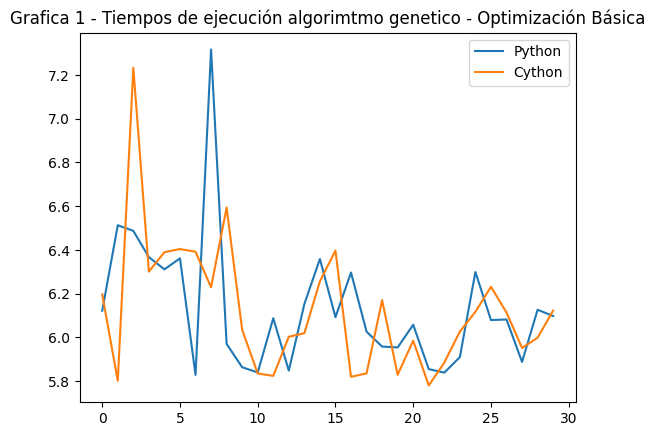

In [59]:
algorithm_genetic_basic.plot.line(title='Grafica 1 - Tiempos de ejecución algorimtmo genetico - Optimización Básica')

### HTML Algoritmo Genético -  Pruebas con Optimización

In [60]:
from IPython.display import HTML
HTML(filename='./annotations/BackpackGeneticsOptimization.html')

<AxesSubplot: title={'center': 'Grafica 2 - Tiempos de ejecución en algorimtmo genetico con optimización'}>

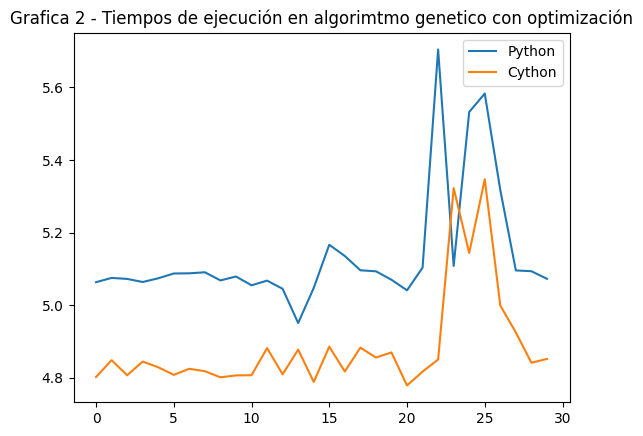

In [61]:
algorithm_genetic_optimization.plot.line(title='Grafica 2 - Tiempos de ejecución en algorimtmo genetico con optimización')

<AxesSubplot: title={'center': 'Grafica 3 - Promedio de Tiempo en las pruebas del algotimo Genetico'}>

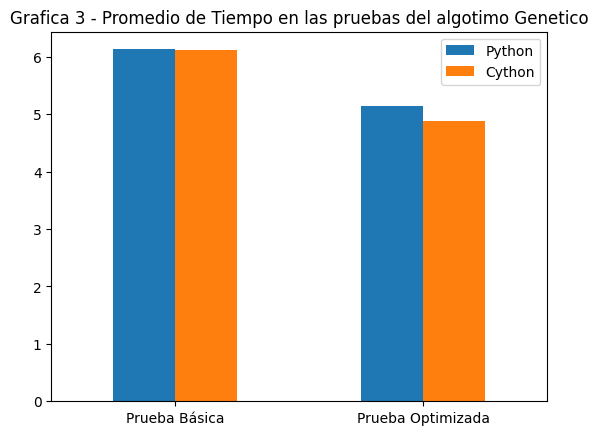

In [62]:
result = pd.DataFrame({'Python':
                       [algorithm_genetic_basic['Python'].mean(), algorithm_genetic_optimization['Python'].mean()],
                       'Cython':[algorithm_genetic_basic['Cython'].mean(), algorithm_genetic_optimization['Cython'].mean()]
                      }, index= ['Prueba Básica','Prueba Optimizada'])

result.plot.bar(rot=0, title='Grafica 3 - Promedio de Tiempo en las pruebas del algotimo Genetico')

# Algoritmo Regresión Logistica
### Prueba Básica
Las anotaciones generadas por cython nos revelan que las funciones de ***predic***, ***cost_funtion*** y ***get_gradients*** pueden representar un costo importante al momento de ejecución, por lo tanto, son las que inicialmente son abordadas.

Como anteriormente se ha mencionado, está implantación usa en su mayor parte la librería de Numpy, la cual se encuentra muy optimizada por lo cual ayuda a que el codigo de Python no tenga muchas diferentes en los tiempos en Python y Cython***(Ver grafica 4)*** .

### Prueba Optimizada

las anotaciones (HTML) generadas después de realizar una optimización de tipos de datos vemos que el código de cython para las funciones ***predic*** y ***cost_funtion*** es menor al visualizar menos regiones de amarillo.

Al ver los tiempos en cada prueba ***(Ver Grafica 6)*** podemos ver que en promedio se ha logrado ***1.5s*** de reducción en los tiempos de ejecución con respecto a su versión de python.

### HTML Algoritmo Regresión Logistica -  Pruebas Básica

In [63]:
from IPython.display import HTML
HTML(filename='./annotations/LogisticRegressionBasic.html')

<AxesSubplot: title={'center': 'Grafica 4 - Tiempos de ejecución algoritmo regresión logistica - Básica'}>

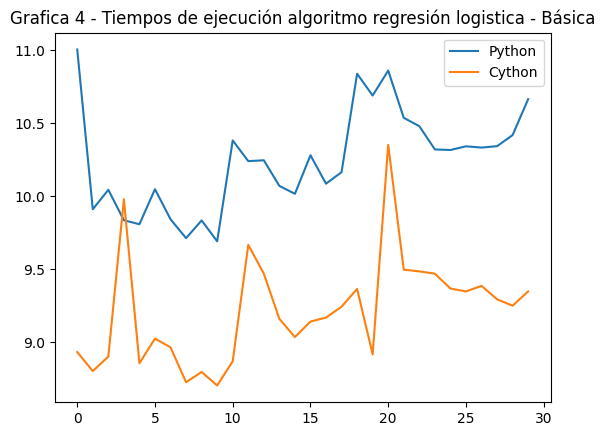

In [64]:
algorithm_regression_basic.plot.line(title='Grafica 4 - Tiempos de ejecución algoritmo regresión logistica - Básica')

### HTML Algoritmo Regresión Logistica -  Prueba Optimizada

In [65]:
from IPython.display import HTML
HTML(filename='./annotations/LogisticRegressionOptimization.html')

<AxesSubplot: title={'center': 'Grafica 5 - Tiempos de ejecución algorimtmo regresión logistica - Optimización'}>

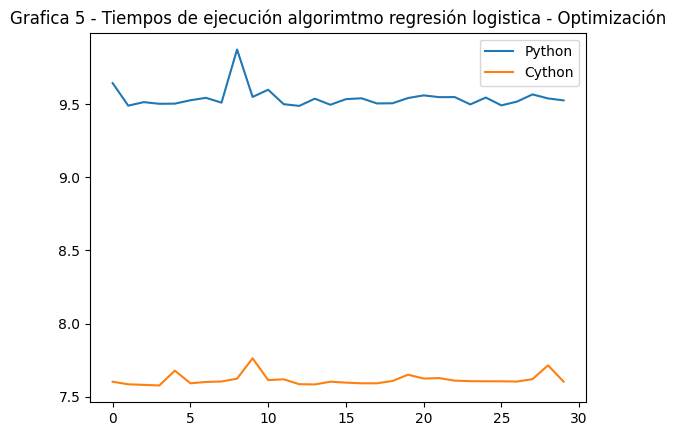

In [66]:
algorithm_regression_optimization.plot.line(title='Grafica 5 - Tiempos de ejecución algorimtmo regresión logistica - Optimización')

<AxesSubplot: title={'center': 'Grafica 6 - Promedio de Tiempo en las pruebas del algotimo de Regresión logistica'}>

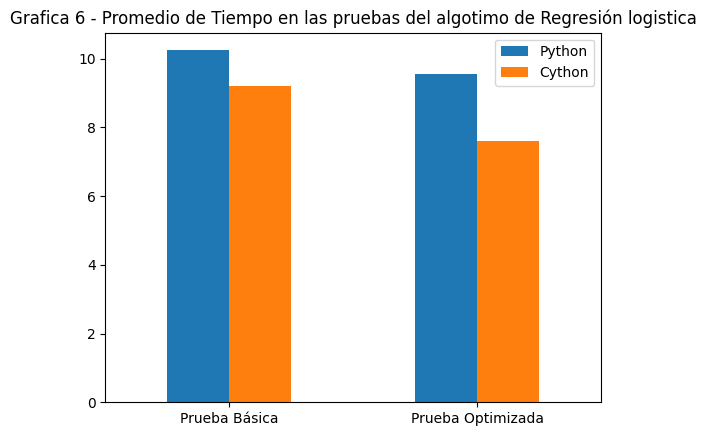

In [67]:
result = pd.DataFrame({'Python':
                       [algorithm_regression_basic['Python'].mean(), algorithm_regression_optimization['Python'].mean()],
                       'Cython':[algorithm_regression_basic['Cython'].mean(), algorithm_regression_optimization['Cython'].mean()]
                      }, index= ['Prueba Básica','Prueba Optimizada'])

result.plot.bar(rot=0, title='Grafica 6 - Promedio de Tiempo en las pruebas del algotimo de Regresión logistica')

## Conclusiones

1. Los algoritmos que hacen uso de la libreria de **Numpy** ya cuentan con un grado de optimización heredado de dicha libreria al haber sido hecha desde Cython. Sin embargo, declarando algunos tipos de datos es posible lograr una reducción de 0.5 a 2 segundos de acuerdo al algoritmo.
2. La optimización es un proceso costo en términos del tiempo que se debe emplear, por ejemplo en el algoritmo genético se ha usado un promedio de 8 horas para lograr una reducción de 0.5 a 1 segundo y un caso similar con el algoritmo de regresión lineal donde se llegó a una mejor de hasta 2 segundos. Por lo tanto, es necesario considerar el nivel de optimization al cual se desea llegar considerando sus costos.
3. Cython cuenta con la cláusula ***cpdef*** que de acuerdo con la documentación genera una versión optimizada para python y otro para cython que puede tener un menor rendimiento que ***cdef*** aunque en las pruebas realizadas con el algoritmo genético se logró una mejor resultado con la primera opción.

# Referencias

[1] A. Emaz and Pérez-Ruiz Una, “ES,” Amazon, 1998. [Online]. Available: https://aws.amazon.com/es/what-is/logistic-regression/?nc1=h_ls. [Accessed: 20-Nov-2022].
[2] “Algoritmo Genético,” Wikipedia, 14-Nov-2022. [Online]. Available: https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico. [Accessed: 20-Nov-2022].
[3] “Knapsack problem,” Wikipedia, 10-Nov-2022. [Online]. Available: https://en.wikipedia.org/wiki/Knapsack_problem. [Accessed: 20-Nov-2022].
